# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, ttest_ind

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# [this might need to be a right join to make this look like the starter code]-cs

merged_data_frame = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
#merged_data_frame = merged_data_frame[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                              # 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

merged_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = len(merged_data_frame['Mouse ID'].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint




# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = merged_data_frame.loc[merged_data_frame.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = merged_data_frame.loc[merged_data_frame["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_dataframe = merged_data_frame.drop_duplicates(subset = "Mouse ID",keep = "last")

clean_dataframe = merged_data_frame.loc[merged_data_frame['Mouse ID'] != 'g989', :]




clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataframe['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_variance = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_standard_deviation = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_sem = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


summary_statistics_dataframe = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_standard_deviation, 
                                    "Tumor Volume Std. Err.": regimen_sem})

summary_statistics_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_dataframe.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

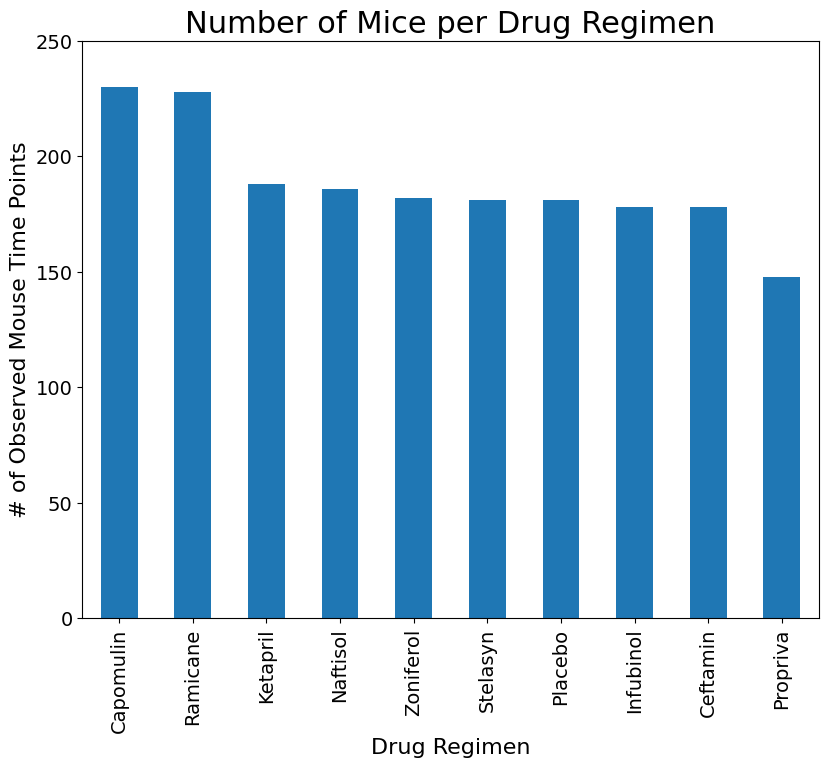

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_dataframe["Drug Regimen"].value_counts().plot(kind="bar", figsize = (9.5,7.5))
 

mice_count.set_xlabel ("Drug Regimen", size = 16)
mice_count.set_ylabel ("# of Observed Mouse Time Points", size = 16)
plt.title("Number of Mice per Drug Regimen", size = 22)
plt.ylim(0, max(clean_dataframe["Drug Regimen"].value_counts() + 20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

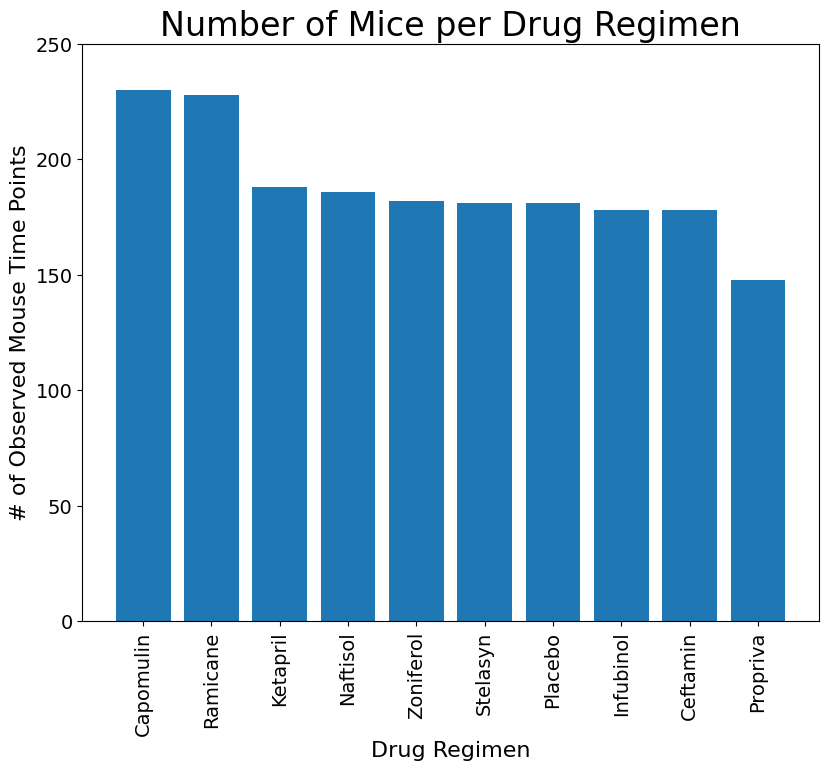

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_count = clean_dataframe["Drug Regimen"].value_counts()


plt.figure(figsize=(9.5,7.5))
plt.bar(drug_count.index, drug_count.values)
plt.title("Number of Mice per Drug Regimen", size = 24)
plt.xlabel("Drug Regimen", size =16)
plt.ylabel("# of Observed Mouse Time Points", size = 16)
plt.ylim(0, max(clean_dataframe["Drug Regimen"].value_counts() + 20))
plt.xticks(rotation="vertical", fontsize=14)
plt.yticks(fontsize=14)

plt.show()



<Axes: title={'center': 'Female vs Male Distribution'}, ylabel='Sex'>

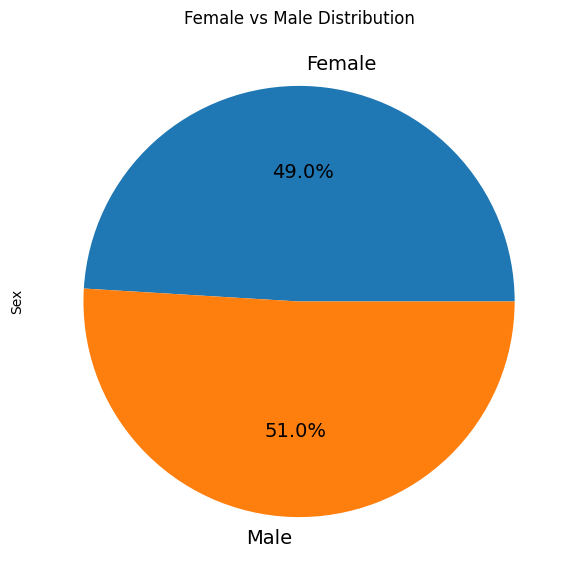

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart

sex_count = clean_dataframe.groupby(['Sex'])['Sex'].count()           
sex_count.plot.pie(title="Female vs Male Distribution",autopct='%1.1f%%', figsize=(7, 7),fontsize = 14) 





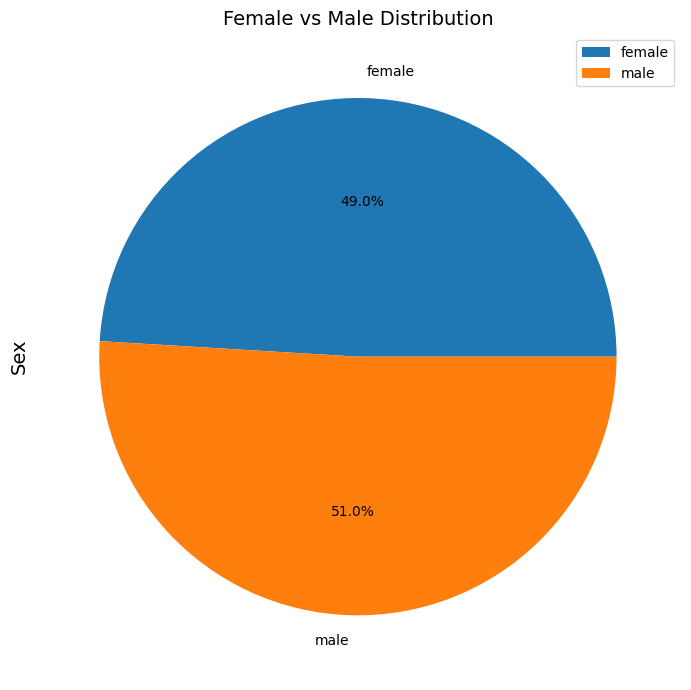

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study



# Get the unique mice with their gender



# Make the pie chart

plt.figure(figsize=(7,7))
plt.pie(sex_count, labels=('female', 'male'), autopct='%1.1f%%')
plt.title("Female vs Male Distribution",fontsize = 14)                        
plt.ylabel('Sex', size=14)                                           
plt.tight_layout()                                             
plt.legend(loc= "best")                                        
plt.show()






## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments_regimens = clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == "Capomulin") | 
                                    (clean_dataframe["Drug Regimen"] == "Ramicane") |
                                    (clean_dataframe["Drug Regimen"] == "Infubinol") |
                                    (clean_dataframe["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]        
                                ]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = treatments_regimens.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
greatest_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume= greatest_timepoint.merge(clean_dataframe[["Mouse ID","Timepoint","Tumor Volume (mm3)"]], 
                                                 on = ["Mouse ID", "Timepoint"], how = "left")
tumor_volume




,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[] for i in range(4)]
for i in range(len(tumor_volume["Tumor Volume (mm3)"])):
    if tumor_volume["Drug Regimen"][i] == treatments [0]:
        tumor_vol[0].append(tumor_volume["Tumor Volume (mm3)"][i])
    elif tumor_volume["Drug Regimen"][i] == treatments [1]:
        tumor_vol[1].append(tumor_volume["Tumor Volume (mm3)"][i])
    elif tumor_volume["Drug Regimen"][i] == treatments [2]:
        tumor_vol[2].append(tumor_volume["Tumor Volume (mm3)"][i])
    elif tumor_volume["Drug Regimen"][i] == treatments [3]:
        tumor_vol[3].append(tumor_volume["Tumor Volume (mm3)"][i])


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = [[] for i in range (4)]
lowerq = [[] for i in range (4)]
upperq = [[] for i in range (4)]
iqr = [[] for i in range (4)]
lower_bound = [[] for i in range (4)]
upper_bound = [[] for i in range (4)]

outliers_list = {}

bound_index = 0

for index, treatment in enumerate (treatments):

    

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds

    quartiles[index] = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])

    #quartiles[index] = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment].quantile([.25,.5,.75])["Tumor Volume (mm3)"]

    lowerq [index]= quartiles[index][0.25]
    upperq [index] = quartiles[index][0.75]
    iqr[index] = upperq[index]-lowerq[index]
    
    print(f"The lower quartile of {treatment} is: {round(lowerq[index],2)}")
    print(f"The upper quartile of {treatment} is: {round(upperq[index],2)}")
    print(f"The interquartile range of {treatment} is: {round(iqr[index],2)}")
    
    lower_bound [index] = lowerq[index] - (1.5*iqr[index])
    upper_bound [index] = upperq[index] + (1.5*iqr[index])
    
    print(f"Potential outliers for {treatment} could exist below {round(lower_bound[index],2)}")
    print(f"Potential outliers for {treatment} could exist above {round(upper_bound[index],2)}")
    print("-----------------------------------------------------")
    
while bound_index <= 3:
    for i in range(len(tumor_volume["Tumor Volume (mm3)"])):
        if (tumor_volume["Tumor Volume (mm3)"][i] < lower_bound [bound_index])\
        & (tumor_volume["Drug Regimen"][i] == treatments[bound_index]):
            outliers_list[tumor_volume["Drug Regimen"][i]] = tumor_volume["Tumor Volume (mm3)"][i]
        
        elif (tumor_volume["Tumor Volume (mm3)"][i] > upper_bound [bound_index])\
        & (tumor_volume["Drug Regimen"][i] == treatments[bound_index]):
            outliers_list[tumor_volume["Drug Regimen"][i]] = tumor_volume["Tumor Volume (mm3)"][i]  
            
    bound_index += 1

for drug, outliers in outliers_list.items():
    print(f'The outlier(s) for {drug}: {round(outliers,2)}')





The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Potential outliers for Capomulin could exist below 20.7
Potential outliers for Capomulin could exist above 51.83
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Potential outliers for Ramicane could exist below 17.91
Potential outliers for Ramicane could exist above 54.31
-----------------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Potential outliers for Infubinol could exist below 36.83
Potential outliers for Infubinol could exist above 82.74
-----------------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceft

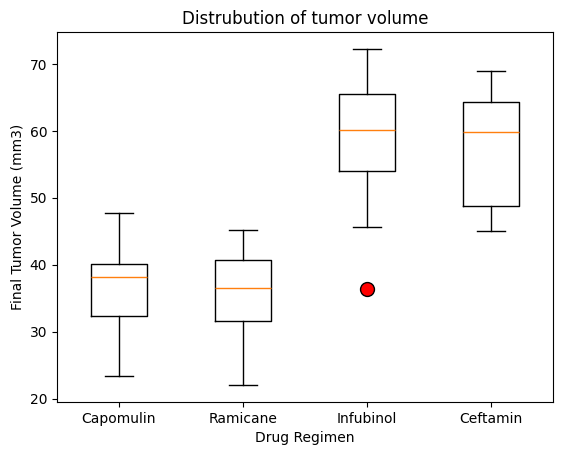

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_vol, tick_labels=treatments, \
                  flierprops = dict(marker = "o",markersize=10, markerfacecolor = "red"))
ax1.set_title('Distrubution of tumor volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

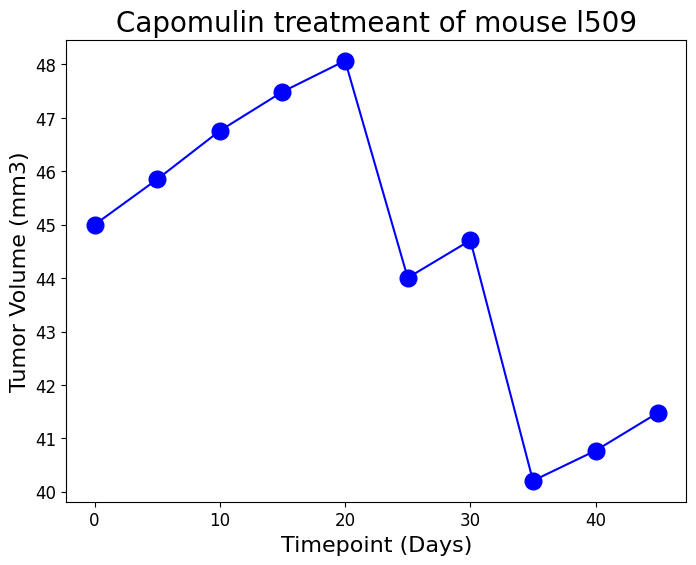

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_ID = clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == 'Capomulin') & (clean_dataframe["Mouse ID"] == 'l509'), :]
                            
capomulin_mouse_ID = capomulin_mouse_ID[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]].reset_index(drop= True)
plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(capomulin_mouse_ID["Timepoint"], capomulin_mouse_ID["Tumor Volume (mm3)"], \
         marker='o', markersize = 12 ,color="blue")
plt.title('Capomulin treatmeant of mouse l509', size =20)
plt.xlabel('Timepoint (Days)', size =16)
plt.ylabel('Tumor Volume (mm3)', size =16)
plt.show()

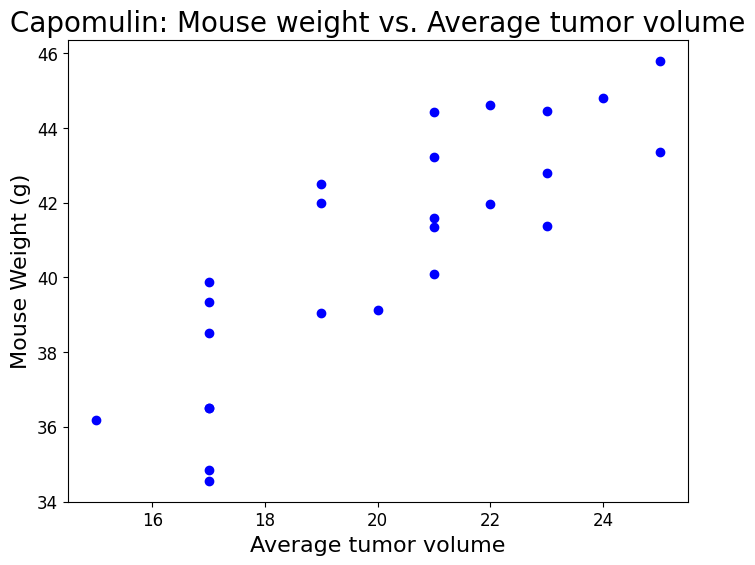

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == 'Capomulin') , :]

#avg_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()

#avg_mouse_weight = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()

avg_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'], color="blue")
plt.title('Capomulin: Mouse weight vs. Average tumor volume', size =20)
plt.xlabel('Average tumor volume', size =16)
plt.ylabel('Mouse Weight (g)', size =16)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


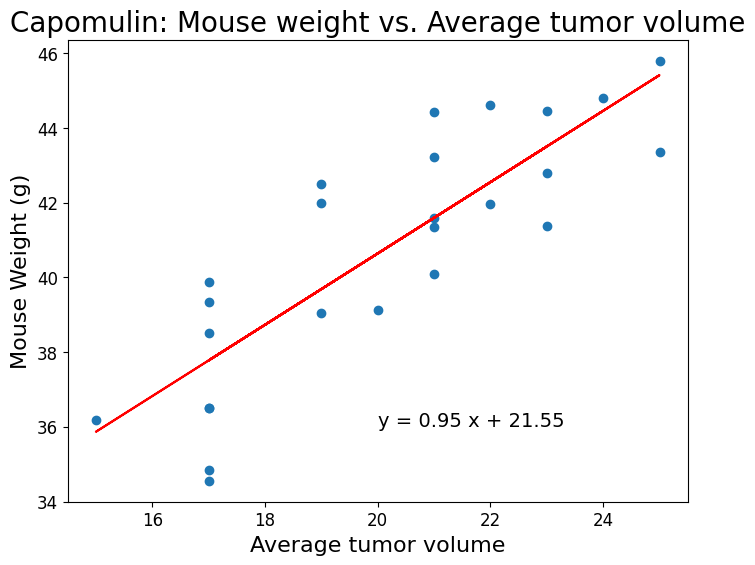

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
regress_values=avg_mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r-squared is: {round(rvalue**2, 2)}")

plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
plt.plot(avg_mouse_weight["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.title('Capomulin: Mouse weight vs. Average tumor volume', size =20)
plt.xlabel('Average tumor volume', size =16)
plt.ylabel('Mouse Weight (g)', size =16)
plt.show()